In [1]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as matcoll
from scipy import stats

In [3]:
def createDirectory(dir:str):
    if not os.path.exists(dir):
        os.makedirs(dir)

In [4]:
def ecdf(xdata):
    xdataecdf = np.sort(xdata)
    ydataecdf = np.arange(1, len(xdata) + 1) / len(xdata)
    return xdataecdf,ydataecdf

In [5]:
def findMeanAndStd(xdata):
    xmean = np.mean(xdata)
    xstd = np.std(xdata)
    return xmean,xstd

In [6]:
def getCASimulationFolder(data, prefix='8e-06_3.2e-05', suffix=''):
    sample_name = f'Polycrystal_{data[0]}_{data[1]}x{data[1]}x{data[1]}'
    simulation_folder = f'/nethome/o.okewale/examples/{prefix}/sim_results{suffix}/{sample_name}/{data[2]}_stand/CA_files'
    return simulation_folder

In [7]:
def getRho(input_file):
    with open(input_file) as f:
        lines = f.readlines()
        x_values = [float(line) for line in lines]
    return x_values

In [13]:
def listMeanAndStd(data, time='0.0', start=1, end=5, prefix="8e-06_3.2e-05"):
    x_data = []
    y_data_std = []
    y_data_mean = []
    for index in range (start, end+1):
        x_data.append(index)
        input_file = f'{getCASimulationFolder(data, prefix=prefix, suffix=f"_{index}")}/{time}/._rho.txt'
        rho = getRho(input_file)
        mean,std = findMeanAndStd(rho)
        y_data_mean.append(mean)
        y_data_std.append(std)
    m_mean,m_std = findMeanAndStd(y_data_mean)
    s_mean,s_std = findMeanAndStd(y_data_std)
    return x_data,[y_data_mean,y_data_std],[m_mean/10**14,m_std/10**14],[s_mean/10**14, s_std/10**14]

In [18]:
for t in ['0.0','2.5','5.0']:
    x,y,z,a = listMeanAndStd([10,14,6000], time=t,start=1,end=1,prefix='4e-06_3.2e-05')
    x1,y1,z1,a1 = listMeanAndStd([98,30,6000], time=t,start=1,end=1,prefix='4e-06_3.2e-05')
    print(y[0][0]/10**14, y[1][0]/10**14, f"<== 10 grains [1-1] | time={t}")
    print(y1[0][0]/10**14, y1[1][0]/10**14, f"<== 98 grains [1-1] | time={t}")
    print("=======================================================")

4.335906852295918 1.3590794892396267 <== 10 grains [1-1] | time=0.0
4.374979168461049 1.503779511492152 <== 98 grains [1-1] | time=0.0
1.0003443919441501 1.7312904318831337 <== 10 grains [1-1] | time=2.5
1.1993645394122785 1.8578513915537247 <== 98 grains [1-1] | time=2.5
0.23960964165983087 0.7432147817145788 <== 10 grains [1-1] | time=5.0
0.480541304554588 1.1796174663339702 <== 98 grains [1-1] | time=5.0


In [20]:
for t in ['0.0','2.5','5.0']:
    x,y,z,a = listMeanAndStd([10,7,6000], time=t,start=1,end=5)
    x1,y1,z1,a1 = listMeanAndStd([98,15,6000], time=t,start=1,end=5)
    x2,y2,z2,a2 = listMeanAndStd([310,22,6000], time=t,start=1,end=5)
    x3,y3,z3,a3 = listMeanAndStd([512,26,6000], time=t,start=1,end=3)
    x4,y4,z4,a4 = listMeanAndStd([955,32,6000], time=t,start=1,end=3)
    print(z,a, f"<== 10 grains [1-5] | time={t}")
    print(z1,a1, f"<== 98 grains [1-5] | time={t}")
    print(z2,a2, f"<== 310 grains [1-5] | time={t}")
    print(z3,a3, f"<== 512 grains [1-3] | time={t}")
    print(z4,a4, f"<== 955 grains [1-3] | time={t}")
    print("=======================================================")

[4.3761149277551015, 0.07051152012341262] [1.4676313194279953, 0.05656987419524241] <== 10 grains [1-5] | time=0.0
[4.3552133032649065, 0.029390495894156828] [1.528231853155646, 0.012464366640069162] <== 98 grains [1-5] | time=0.0
[4.310780148863005, 0.03504946404074591] [1.5118825902276947, 0.018211345867420587] <== 310 grains [1-5] | time=0.0
[4.31295988125041, 0.018343829307720428] [1.5172792950754521, 0.009641330311969341] <== 512 grains [1-3] | time=0.0
[4.282316901390262, 0.00551059413411032] [1.5071417003305765, 0.007668664592175478] <== 955 grains [1-3] | time=0.0
[1.678088447061297, 0.31111403728140635] [2.120977119485241, 0.11897066246030459] <== 10 grains [1-5] | time=2.5
[1.778064651280831, 0.06928712166871555] [2.122803387263425, 0.027989608860854796] <== 98 grains [1-5] | time=2.5
[1.922074662783278, 0.0642245121852446] [2.1666859945114845, 0.025083696699741816] <== 310 grains [1-5] | time=2.5
[1.8959918726503462, 0.04892307303892349] [2.168983547778023, 0.017507975600490

In [15]:
def plotMean(allData, time='0.0'):
    x_data = [n[0] for n in allData]
    y_data_std = []
    y_data_mean = []
    for data in allData:
        input_file = f'{getCASimulationFolder(data)}/{time}/._rho.txt'
        rho = getRho(input_file)
        mean,std = findMeanAndStd(rho)
        y_data_mean.append(mean)
        y_data_std.append(std)
    return x_data,[y_data_mean,y_data_std]

In [16]:
def plotECDF(data):
    # data = [98,15,6000]
    # sample_name = f'Polycrystal_{data[0]}_{data[1]}x{data[1]}x{data[1]}'
    # simulation_folder = f'/nethome/o.okewale/examples/sim_results/{sample_name}/{data[2]}_stand/CA_files'
    sel_seconds = ['0.0','2.5','5.0']
    plt.figure()
    for sec in sel_seconds:
        input_file = f'{getCASimulationFolder(data)}/{sec}/._rho.txt'
        x_values = getRho(input_file)
        
        x,y = ecdf(x_values)
        #Plot the data
        # plt.figure()
        plt.plot(x, y) # , marker='.', linestyle='none'
        plt.xlabel('Dislocation density $\\rho$')
        plt.legend(sel_seconds)
        plt.ylabel('ECDF')
        plt.margins(0.1)

In [17]:
def plotStandardDev(allData):
    x,y = plotMean(allData, time='5.0')
    x1,y1 = plotMean(allData, time='0.0')
    # x2,y2 = plotMean(allData, time='2.5')
    print(x)
    print(y[1])

    y_diff = [y1[1][i] - y[1][i] for i in range(0,len(y[1]))]
    y_avg = [np.average([y1[1][i],y[1][i]]) for i in range(0,len(y[1]))]
    y_coll = [[y1[1][i],y[1][i]] for i in range(0,len(y[1]))]
    print(y_diff)
    print(y_avg)
    print(y_coll, "<== Y Coll")
    str_x = [f'{a}' for a in x]
    x_coll = [[f'{a}',f'{a}'] for a in x]
    print(x_coll, "<== X Coll")

    # linecoll = matcoll.LineCollection(y_coll,colors='k')
    plt.figure()
    plt.plot(str_x, y_avg, marker='.', linestyle='-') # , marker='.', linestyle='none'
    plt.plot(str_x, y_coll, marker='.', linestyle='none')
    plt.legend(['avg','5.0s','0.0s'], title='Annealing time')
    plt.xlabel('grain no.')
    # plt.ylabel('$(\sigma_{5.0} + \sigma_{0.0})/2$')
    plt.ylabel('$\sigma$')
    plt.figure()
    plt.plot(str_x, y_diff, marker='.', linestyle='-') # , marker='.', linestyle='none'
    plt.xlabel('grain no.')
    plt.ylabel('$\sigma_{5.0} - \sigma_{0.0}$')
    plt.margins(0.1)

In [18]:
def doKSTest(data1, data2, time='0.0'):
    x_val1 = getRho(f'{getCASimulationFolder(data1)}/{time}/._rho.txt')
    x_val2 = getRho(f'{getCASimulationFolder(data2)}/{time}/._rho.txt')
    result = stats.ks_2samp(x_val1,x_val2)
    return result

[10, 98, 512, 955, 2160]
[56376229533571.195, 88265510072867.36, 109704808043969.56, 107814923782556.64, 112283057316157.06]
[97483418929395.94, 66077701893021.95, 43070878778357.78, 42169061828733.67, 38012968736005.31]
[105117938998269.16, 121304361019378.34, 131240247433148.45, 128899454696923.47, 131289541684159.72]
[[153859648462967.12, 56376229533571.195], [154343211965889.3, 88265510072867.36], [152775686822327.34, 109704808043969.56], [149983985611290.3, 107814923782556.64], [150296026052162.38, 112283057316157.06]] <== Y Coll
[['10', '10'], ['98', '98'], ['512', '512'], ['955', '955'], ['2160', '2160']] <== X Coll


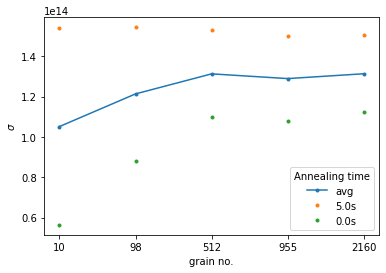

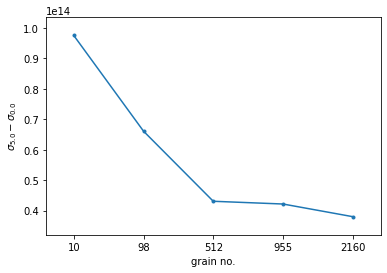

In [21]:
all_simulations = [
    [10,7,6000],
    [98,15,6000],
    [512,26,6000],
    [955,32,6000],
    [2160,42,6000],
]

# for dt in all_simulations:
#     plotECDF(dt)

# plotECDF(all_simulations[2])
plotStandardDev(all_simulations)
# print(doKSTest(all_simulations[4], all_simulations[3], time='0.0'))
# print(doKSTest(all_simulations[4], all_simulations[3], time='2.5'))
# print(doKSTest(all_simulations[4], all_simulations[3], time='0.0'))
# print(doKSTest(all_simulations[4], all_simulations[2], time='0.0'))
# print(doKSTest(all_simulations[4], all_simulations[1], time='0.0'))
# print(doKSTest(all_simulations[4], all_simulations[0], time='0.0'))

In [ ]:
def plotKSTest(allData, time_array):
    # This function assumes the last value is the one being compared to.
    output_folder = f'./plots/KSTest'
    createDirectory(output_folder)
    for time in time_array:
        x_data = [f'{allData[i][0]}' for i in range(0,len(allData)-1)]
        y_data = [doKSTest(allData[len(allData)-1], allData[s], time)[1] for s in range(0,len(allData)-1)]
        # print(x_data)
        # print(y_data)
        plt.figure()
        plt.plot(x_data, y_data, marker='.', linestyle='-') # , marker='.', linestyle='none'
        # plt.legend(['avg','5.0s','0.0s'], title='Annealing time')
        plt.xlabel('grain no.')
        plt.ylabel('p-value')
        plt.savefig(f'{output_folder}/{time}s_KSTest_on_dislocation_density.png', bbox_inches='tight')
    
times=[round(g,1) for g in np.arange(0.0,5.1,0.5)]
plotKSTest(all_simulations,time_array=times)
# print(times)